In [1]:
import pandas, seaborn, numpy

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

import pyensembl
annotation = pyensembl.EnsemblRelease(100)

# 1. read data

In [2]:
data_file = '/home/adrian/projects/vigur/results/deseq2_filtered/strict_union_experiment_three.tsv'
df = pandas.read_csv(data_file, sep='\t')
df.set_index('gene_name', drop=True, inplace=True)
df.drop(columns=['zero4', 'zero24'], inplace=True)
df.drop(columns=['half24', 'five24', 'fifty24'], inplace=True)
df = df[df.abs().max(axis=1) >= 0.5]

df.shape

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(160, 3)

# 2. plot data

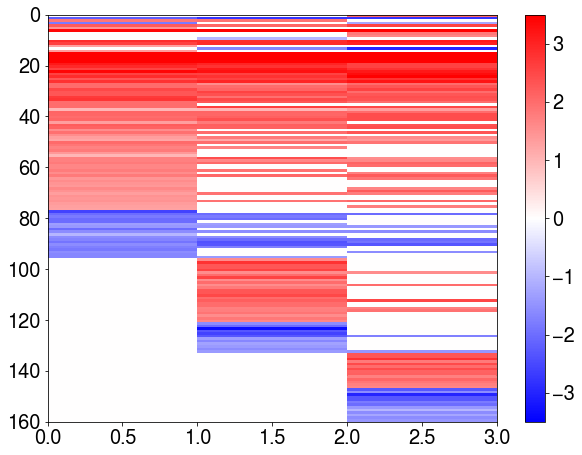

In [26]:
fig = matplotlib.pyplot.figure(figsize=1.4*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)
o = ax.pcolor(df, cmap='bwr', vmin=-3.5, vmax=3.5)

fig.gca().invert_yaxis()

cbar = fig.colorbar(o, ax=ax)
cbar.set_label('log2FC', rotation=0-)
fig.tight_layout()

fig.savefig('original.svg')
